In [1]:
import sys
sys.path.insert(1, '..')

from plotting import *

leader_dir = "../benchmark_runs/0510_1227_succ_DTMC_run/leader/csv/"
crowds_dir = "../benchmark_runs/0510_1227_succ_DTMC_run/crowds/csv/"
brp_dir = "../benchmark_runs/0510_1227_succ_DTMC_run/brp/csv/"

consensus_dir = "../benchmark_runs/1410_1603/consensus/csv/"
csma_dir = "../benchmark_runs/1410_1603/csma/csv/"

heur_iteration_val = 2

## Leader protocol (DTMC)

../benchmark_runs/0510_1227_succ_DTMC_run/leader/csv/leader-4-8.csv
states:12400
../benchmark_runs/0510_1227_succ_DTMC_run/leader/csv/leader-4-8.csv
local 0.30000000000000004 0.3
violation percentage: 0.014285714285714285


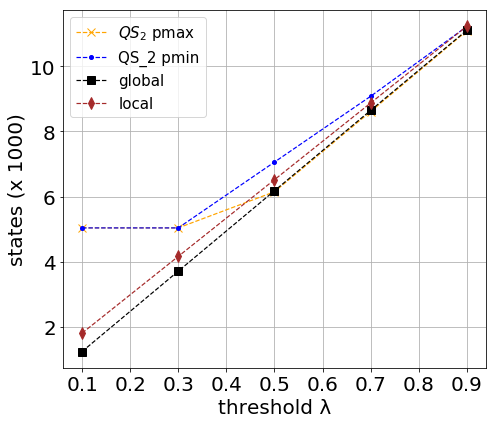

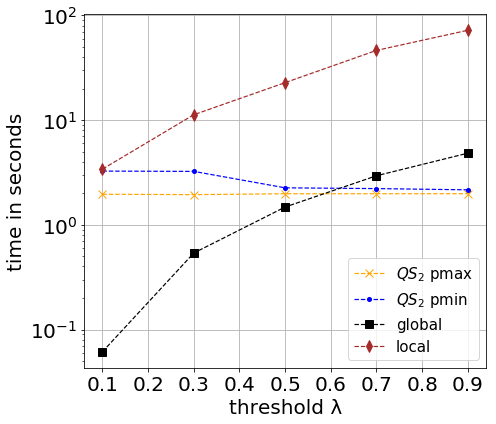

In [2]:
run(leader_dir + "leader-4-8.csv",heur_iteration_val,plot_exact=False,ymode="x1000")

../benchmark_runs/0510_1227_succ_DTMC_run/leader/csv/leader-5-6.csv
states:31383
../benchmark_runs/0510_1227_succ_DTMC_run/leader/csv/leader-5-6.csv
y form 0.5 0.4999999999989591
y form 0.5 0.4999999999989591
y form 0.5 0.4999999999989591
y form 0.5 0.4999999999989591
y exact 0.5 0.4999999999989591
z exact 0.5 0.4999999999989591
violation percentage: 0.08571428571428572


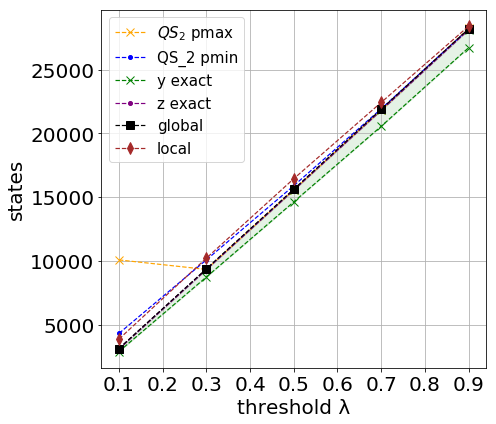

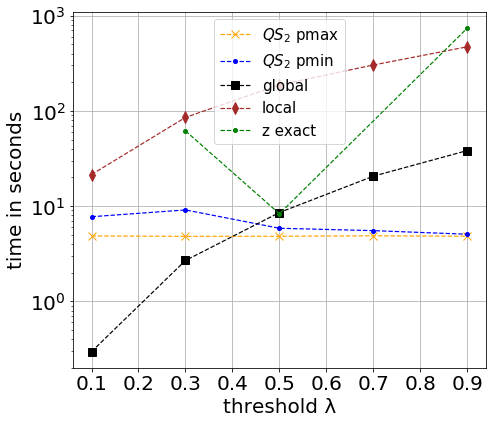

In [3]:
run(leader_dir + "leader-5-6.csv",heur_iteration_val,plot_exact=True)

../benchmark_runs/0510_1227_succ_DTMC_run/leader/csv/leader-5-8.csv
states:131521
violation percentage: 0.0


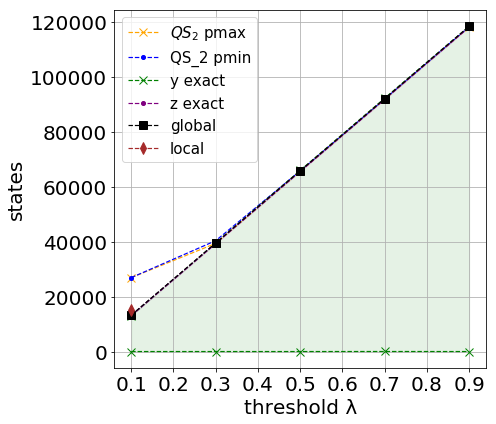

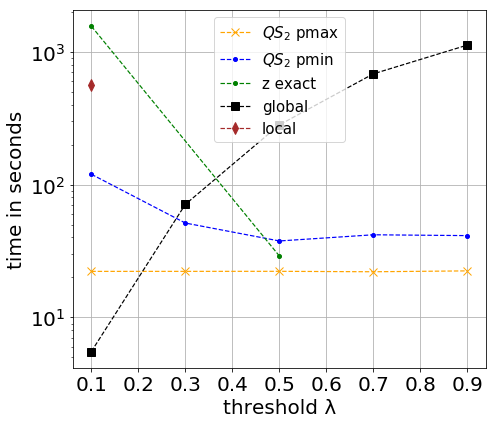

In [4]:
run(leader_dir + "leader-5-8.csv",heur_iteration_val,plot_exact=True)

y form:
z form:


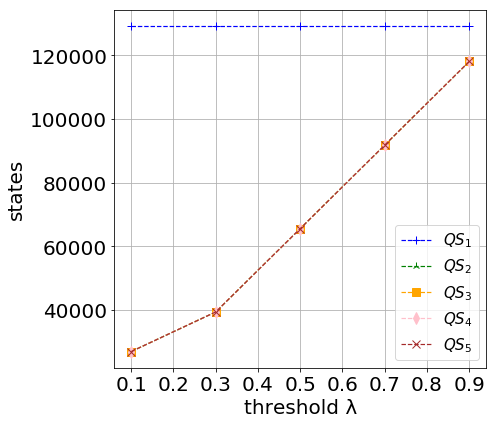

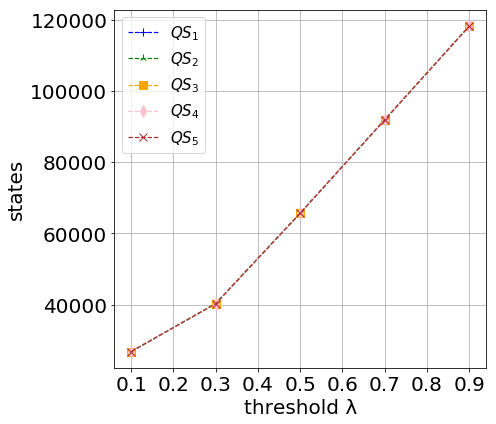

In [5]:
plot_heur_val_comp(leader_dir + "leader-5-8.csv")

../benchmark_runs/0510_1227_succ_DTMC_run/leader/csv/leader-8-4.csv
states:460239
../benchmark_runs/0510_1227_succ_DTMC_run/leader/csv/leader-8-4.csv
y form 0.8999999999999999 0.8999999999722945
y form 0.8999999999999999 0.8999999999722945
y form 0.8999999999999999 0.8999999999722945
y form 0.8999999999999999 0.8999999999722945
y form 0.8999999999999999 0.8999999999722945
y exact 0.8999999999999999 0.8999999999722945
violation percentage: 0.08571428571428572


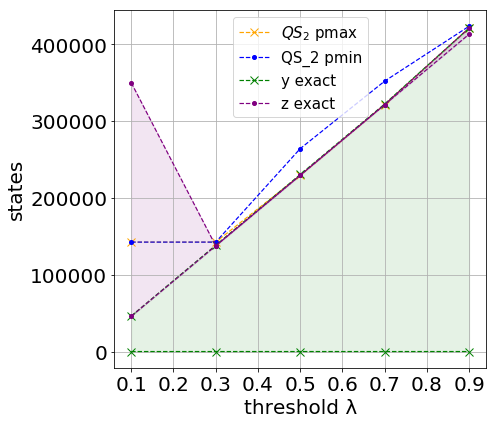

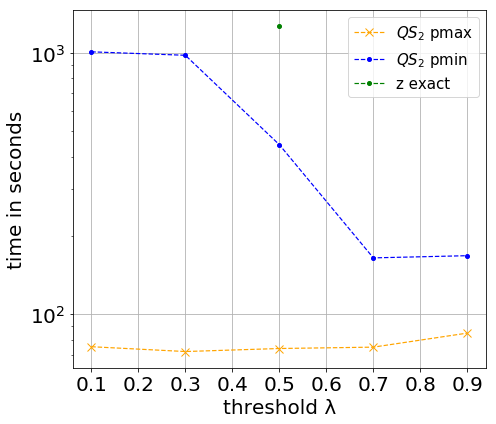

In [6]:
run(leader_dir + "leader-8-4.csv",heur_iteration_val,plot_exact=True)

## Crowds protocol

../benchmark_runs/0510_1227_succ_DTMC_run/crowds/csv/crowds-2-8.csv
states:1805
violation percentage: 0.0


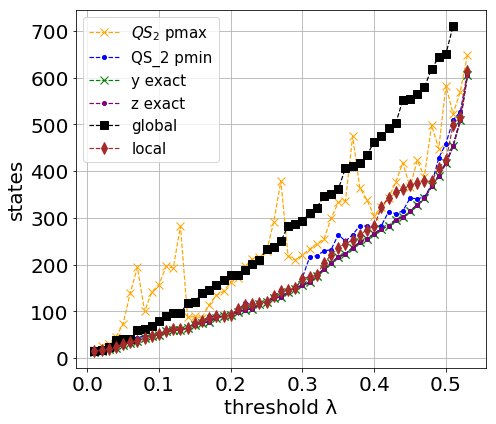

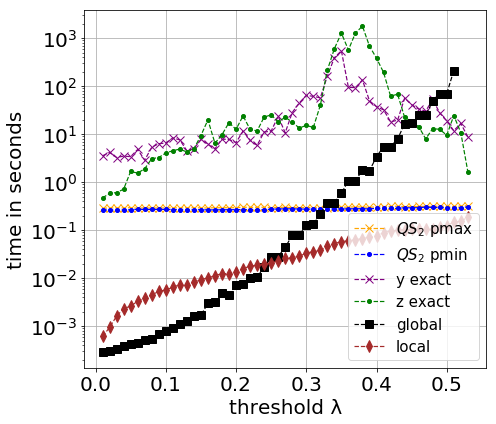

In [7]:
run(crowds_dir + "crowds-2-8.csv",heur_iteration_val,plot_exact=True)

y form:
z form:


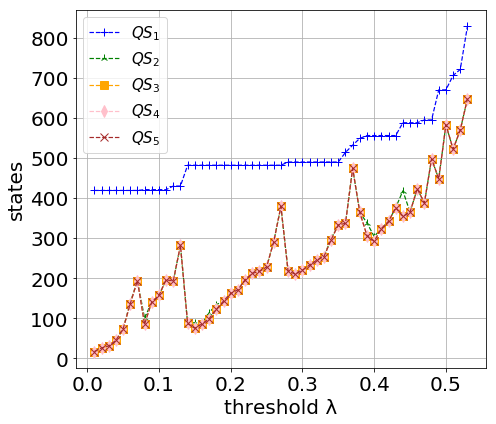

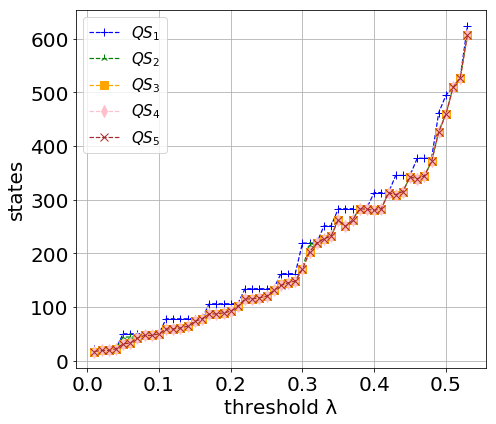

In [8]:
plot_heur_val_comp(crowds_dir + "crowds-2-8.csv")

../benchmark_runs/0510_1227_succ_DTMC_run/crowds/csv/crowds-5-8.csv
states:46873
../benchmark_runs/0510_1227_succ_DTMC_run/crowds/csv/crowds-5-8.csv
y form 0.2800000000000001 0.27999999979247536
y form 0.3000000000000001 0.299999998952545
violation percentage: 0.004761904761904762


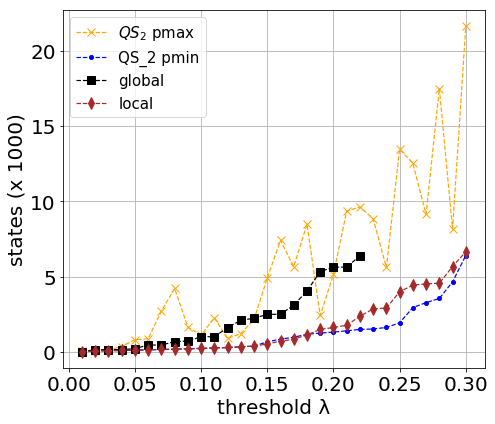

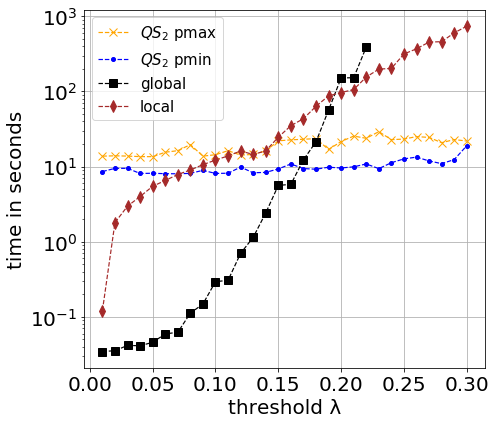

In [9]:
run(crowds_dir + "crowds-5-8.csv",heur_iteration_val,plot_exact=False,ymode="x1000")

## Bounded retransmission protocol


../benchmark_runs/0510_1227_succ_DTMC_run/brp/csv/brp-512-2.csv
states:15875


FileNotFoundError: [Errno 2] No such file or directory: 'plots/brp-512-2_states.pdf'

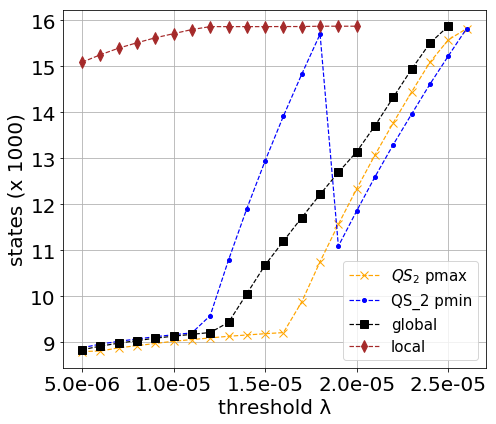

In [10]:
run(brp_dir + "brp-512-2.csv",heur_iteration_val,plot_exact=False,xmode="e",ymode="x1000",to_pdf=True)

In [ ]:
run(brp_dir + "brp-32-2.csv",heur_iteration_val,plot_exact=True,xmode="e")

In [ ]:
plot_heur_val_comp(brp_dir + "brp-32-2.csv",xmode="e")

## Consensus protocol (MDP)
### consensus-2-4
520 States

In [ ]:
run(consensus_dir + "consensus-2-4.csv",heur_iteration_val,plot_exact=True,prmin=False,to_pdf=True)

In [ ]:
run(consensus_dir + "consensus-2-4.csv",heur_iteration_val,plot_exact=True,prmax=False,to_pdf=True)

## consensus-4-4

In [ ]:
plot_csv("csv/consensus/consensus-4-4.csv")

## CSMA protocol (MDP)
### csma-2-4
(States 7958, Transitions 10594)

In [ ]:
run(csma_dir + "csma-3-2.csv",2,plot_exact=True,prmin=False)

In [ ]:
run(csma_dir + "csma-2-6.csv",2,plot_exact=True,prmax=False)

In [ ]:
run(csma_dir + "csma-3-2.csv",2,plot_exact=True,prmin=False,ymode="x1000")

In [ ]:
run(csma_dir + "csma-3-2.csv",2,plot_exact=True,prmax=False,ymode="x1000")

### csma-2-6
(States 66718, Transitions 93072)


In [ ]:
plot_csv("csv/csma/csma-2-6.csv")

In [ ]:
eval_rounding_err("/Users/simon/devel/Farkas/csv/")

In [ ]:
def plot_csv(csv_file_path):
    data = pd.read_csv(csv_file_path,delimiter=",")
    data = data[(data['time'].astype(str) != "-")]
    data['time'] = pd.to_numeric(data['time'])
    data['states'] = pd.to_numeric(data['states'])
    data_y = data[((data['mode'] == "y_form") | (data['mode'] == "prmax"))]
    data_z = data[((data['mode'] == "z_form") | (data['mode'] == "prmin"))]
    data_comics_global = data[(data['mode'] == "global")]
    data_comics_local = data[(data['mode'] == "local")]
    fig = plt.figure(figsize=(12,6))
    ax1 = fig.add_subplot(111)
    ax1.set_ylabel("states")
    ax1.plot(data_y['threshold'],data_y['states'],marker='x',linestyle="dashed",linewidth=0.8,color="blue",label="subsys y")
    ax1.plot(data_z['threshold'],data_z['states'],marker='x',linestyle="dashed",linewidth=0.8,color="green",label="subsys z")
    ax1.plot(data_comics_global['threshold'],data_comics_global['states'],marker='x',linestyle="dashed",linewidth=0.8,color="red",label="comics global")
    ax1.plot(data_comics_local['threshold'],data_comics_local['states'],marker='x',linestyle="dashed",linewidth=0.8,color="orange",label="comics local")
    ax2 = ax1.twinx()
    ax2.set_ylabel("time(seconds)",color="y")
#    ax2.set_yscale('log')
    ax2.plot(data_y['threshold'],data_y['time'],marker='o',linestyle="dashed",linewidth=0.8,color="lightblue",label="time y")
    ax2.plot(data_z['threshold'],data_z['time'],marker='o',linestyle="dashed",linewidth=0.8,color="lightgreen",label="time z")
    ax2.plot(data_comics_global['threshold'],data_comics_global['time'],marker='o',linestyle="dashed",linewidth=0.8,color="salmon",label="time comics global")
    ax2.plot(data_comics_local['threshold'],data_comics_local['time'],marker='o',linestyle="dashed",linewidth=0.8,color="yellow",label="time comics local")
    fig.legend(loc='upper left', bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)
